In [1]:
# pipenv install pandas colorama scipy tensorboard plotly scikit-learn catboost shap ipykernel ipywidgets nbformat

# Importar bibliotecas

# EDA
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
from colorama import Fore, Back, Style

# Visualização
import plotly.express as px
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configurar visualização dos dados
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True, precision=3)

# ML
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss, roc_curve, roc_auc_score

# Interpretabilidade
import shap

### Carregar os dados

In [2]:
df_empresas = pd.read_csv('./datasets/companies_profile.csv')

### Análise Inicial

In [3]:
# Visualizar a estrutura
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1000 non-null   int64  
 1   Nome_Empresa               1000 non-null   object 
 2   Receita_Anual              1000 non-null   int64  
 3   Margem_Liquida             1000 non-null   float64
 4   Endividamento              1000 non-null   float64
 5   Setor                      1000 non-null   object 
 6   Regiao                     1000 non-null   object 
 7   Tempo_Operacao             1000 non-null   int64  
 8   Auditoria_Externa          1000 non-null   int64  
 9   Rating_Credito             1000 non-null   float64
 10  Tipo_Empresa               1000 non-null   object 
 11  Politica_Sustentabilidade  1000 non-null   object 
 12  Estrategia_Expansao        1000 non-null   object 
 13  Gestao_Risco               1000 non-null   object

In [ ]:
df_empresas.head(5)

,ID,Nome_Empresa,Receita_Anual,Margem_Liquida,Endividamento,Setor,Regiao,Tempo_Operacao,Auditoria_Externa,Rating_Credito,...,Estrategia_Expansao,Gestao_Risco,Cobertura_Seguros,Maturidade_Digital,Governanca_Corporativa,Cultura_Inovacao,Relacao_Comunidade,Risco_Credito,Risco_Compliance,Risco_Mercado
0,1,Hahn Group,6523388,0.483,1.033,Manufatura,Europa,26,0,0.939,...,Parcerias,Centralizada,Básica,Avançada,Fraca,Neutra,Regular,0,0,0
1,2,Lopez Group,6650634,0.121,0.493,Tecnologia,Europa,20,1,0.492,...,Orgânica,Centralizada,Básica,Inicial,Média,Neutra,Ruim,0,0,0
2,3,Sparks and Sons,4404572,0.190,0.757,Manufatura,América Latina,6,0,0.701,...,Orgânica,Decentralizada,Básica,Inicial,Alta,Neutra,Boa,0,0,0
3,4,"Fields, Ramirez and Craig",2334489,0.402,2.328,Manufatura,Europa,6,1,0.856,...,Parcerias,Centralizada,Nenhuma,Intermediária,Média,Inovadora,Excelente,1,0,0
4,5,"Campbell, Hernandez and Lyons",9624682,0.175,1.722,Saúde,América do Norte,18,1,0.418,...,Aquisições,Decentralizada,Nenhuma,Avançada,Fraca,Neutra,Regular,0,0,0


In [5]:
# Visualizar últimas linhas
df_empresas.tail(5)

,ID,Nome_Empresa,Receita_Anual,Margem_Liquida,Endividamento,Setor,Regiao,Tempo_Operacao,Auditoria_Externa,Rating_Credito,...,Estrategia_Expansao,Gestao_Risco,Cobertura_Seguros,Maturidade_Digital,Governanca_Corporativa,Cultura_Inovacao,Relacao_Comunidade,Risco_Credito,Risco_Compliance,Risco_Mercado
995,996,Kelley-Ali,1145482,-0.122,1.331,Financeiro,América do Norte,44,1,0.983,...,Parcerias,Decentralizada,Nenhuma,Avançada,Média,Inovadora,Regular,0,0,0
996,997,Sawyer-Phillips,5886265,0.219,1.256,Saúde,Europa,18,1,0.536,...,Orgânica,Decentralizada,Básica,Inicial,Alta,Inovadora,Regular,0,0,0
997,998,"Chang, Dudley and Lee",6008635,-0.133,1.625,Tecnologia,Europa,24,1,0.503,...,Parcerias,Decentralizada,Nenhuma,Intermediária,Alta,Inovadora,Ruim,0,0,0
998,999,Bradshaw Inc,7587345,0.063,0.318,Tecnologia,Ásia,47,1,0.258,...,Aquisições,Centralizada,Ampla,Intermediária,Alta,Neutra,Regular,1,0,0
999,1000,Schneider-Nguyen,9783910,0.185,0.178,Saúde,América do Norte,40,0,0.701,...,Aquisições,Centralizada,Nenhuma,Avançada,Fraca,Inovadora,Ruim,0,0,0


In [6]:
# Valores possíveis para variáveis categóricas
for col in df_empresas.drop(columns=['Nome_Empresa']).select_dtypes(include=['object']).columns:
  print(f'\nValores unicos para {col}:')
  print(df_empresas[col].unique())


Valores unicos para Setor:
['Manufatura' 'Tecnologia' 'Saúde' 'Financeiro']

Valores unicos para Regiao:
['Europa' 'América Latina' 'América do Norte' 'Ásia']

Valores unicos para Tipo_Empresa:
['MEI' 'S.A.' 'Limitada' 'Multinacional']

Valores unicos para Politica_Sustentabilidade:
['Baixa' 'Alta' 'Média']

Valores unicos para Estrategia_Expansao:
['Parcerias' 'Orgânica' 'Aquisições']

Valores unicos para Gestao_Risco:
['Centralizada' 'Decentralizada']

Valores unicos para Cobertura_Seguros:
['Básica' 'Nenhuma' 'Ampla']

Valores unicos para Maturidade_Digital:
['Avançada' 'Inicial' 'Intermediária']

Valores unicos para Governanca_Corporativa:
['Fraca' 'Média' 'Alta']

Valores unicos para Cultura_Inovacao:
['Neutra' 'Inovadora' 'Conservadora']

Valores unicos para Relacao_Comunidade:
['Regular' 'Ruim' 'Boa' 'Excelente']


In [ ]:
# Estatísticas das variáveis numéricas
df_empresas.describe()

,ID,Receita_Anual,Margem_Liquida,Endividamento,Tempo_Operacao,Auditoria_Externa,Rating_Credito,Risco_Credito,Risco_Compliance,Risco_Mercado
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,500.500,4992927.505,0.152,1.318,25.367,0.496,0.487,0.595,0.206,0.110
std,288.819,2804931.116,0.200,0.701,14.104,0.500,0.293,0.491,0.405,0.313
min,1.000,139353.000,-0.200,0.100,1.000,0.000,0.001,0.000,0.000,0.000
25%,250.750,2646177.750,-0.021,0.692,13.000,0.000,0.232,0.000,0.000,0.000
50%,500.500,5032603.000,0.160,1.364,25.000,0.000,0.476,1.000,0.000,0.000
75%,750.250,7270657.750,0.324,1.920,38.000,1.000,0.742,1.000,0.000,0.000
max,1000.000,9989550.000,0.500,2.499,49.000,1.000,0.999,1.000,1.000,1.000


### EDA

In [8]:
# Lista de features numéricas
features_numericas = df_empresas.drop(columns=['ID', 'Risco_Credito', 'Risco_Compliance', 'Risco_Mercado'], axis=1).select_dtypes(include=['float64', 'int64']).columns
features_numericas

Index(['Receita_Anual', 'Margem_Liquida', 'Endividamento', 'Tempo_Operacao',
       'Auditoria_Externa', 'Rating_Credito'],
      dtype='object')

In [9]:
# Visualizar a distribuição das features numéricas
for col in features_numericas:
  fig = px.histogram(df_empresas, x=col, nbins=20, title=f'Distribuição de {col}')
  fig.show()

In [10]:
# Lista de features categóricas
features_categoricas = df_empresas.drop(columns=['Nome_Empresa']).select_dtypes(include=['object']).columns
features_categoricas

Index(['Setor', 'Regiao', 'Tipo_Empresa', 'Politica_Sustentabilidade',
       'Estrategia_Expansao', 'Gestao_Risco', 'Cobertura_Seguros',
       'Maturidade_Digital', 'Governanca_Corporativa', 'Cultura_Inovacao',
       'Relacao_Comunidade'],
      dtype='object')

In [11]:
# Contagem de valores para variáveis categóricas
for col in features_categoricas:
  df_count = df_empresas[col].value_counts().reset_index()
  df_count.columns = ['categoria', 'contagem']
  fig = px.bar(
    df_count,
    x='categoria',
    y='contagem',
    title=f'Distribuição / Contagem de {col}'
  )
  fig.show()

In [12]:
# Lista de Targets
targets = ['Risco_Credito', 'Risco_Compliance', 'Risco_Mercado']

In [13]:
# Visualizar Distribuição dos targets
for col in targets:
  df_count = df_empresas[col].value_counts().reset_index()
  df_count.columns = ['categoria', 'contagem']
  fig = px.bar(
    df_count,
    x='categoria',
    y='contagem',
    title=f'Distribuição / Contagem de {col}'
  )
  fig.show()

In [14]:
# Analisar relação entre features numéricas e categoricas e os targets
for target in targets:
  for col in features_numericas:
    fig = px.box(
      df_empresas,
      x=target,
      y=col,
      title=f'{col} por {target}'
    )
    fig.show()

  for col in features_categoricas:
    fig = px.histogram(
      df_empresas,
      x=col,
      color=target,
      barmode='group',
      title=f'{col} por {target}'
    )
    fig.show()

In [15]:
# Matriz de Correlação
correlation_matrix = df_empresas[features_numericas.tolist() + targets].corr()

# Heatmap da matriz de correlação
fig = px.imshow(
  correlation_matrix,
  color_continuous_scale='armyrose',
  title='Matriz de Correlação',
  zmin=-1,
  zmax=1
)

# Ajustes no Heatmap
fig.update_traces(
  text=correlation_matrix, 
  texttemplate='%{text:.1%}', 
  textfont=dict(size=9)
)
fig.update_layout(
  width=1000,
  height=600,
  title_font=dict(size=14),
  font=dict(size=10)
)

fig.show()

In [16]:
# ANOVA - Análise de Variância (diferença significativa entre médias entre 3 ou mais grupos)
# T-Student - (diferença significativa entre médias entre 2 grupos)
for col in features_numericas:
  for target in targets:
    groups = [df_empresas[df_empresas[target] == val][col] for val in df_empresas[target].unique()]
    
    if df_empresas[target].nunique() <= 2:
      stat, p = ttest_ind(*groups)
      teste = 'T-Test'
    elif df_empresas[target].nunique() > 2:
      stat, p = f_oneway(*groups)
      teste = 'ANOVA'
    print(
      f'{Fore.RED if p < 0.05 else Fore.WHITE}'
      f'{teste} entre {col} e {target}: p-valor = {p}'
    )

T-Test entre Receita_Anual e Risco_Credito: p-valor = 0.9148230907469925
T-Test entre Receita_Anual e Risco_Compliance: p-valor = 0.37245390731630845
T-Test entre Receita_Anual e Risco_Mercado: p-valor = 1.4322662899167404e-06
T-Test entre Margem_Liquida e Risco_Credito: p-valor = 0.714839504289611
T-Test entre Margem_Liquida e Risco_Compliance: p-valor = 7.293209908090928e-67
T-Test entre Margem_Liquida e Risco_Mercado: p-valor = 0.4678700538767202
T-Test entre Endividamento e Risco_Credito: p-valor = 2.0286202656673824e-48
T-Test entre Endividamento e Risco_Compliance: p-valor = 0.028739447727093168
T-Test entre Endividamento e Risco_Mercado: p-valor = 0.6427051699118199
T-Test entre Tempo_Operacao e Risco_Credito: p-valor = 0.7368086294717284
T-Test entre Tempo_Operacao e Risco_Compliance: p-valor = 0.687526198825497
T-Test entre Tempo_Operacao e Risco_Mercado: p-valor = 9.253489005940335e-41
T-Test entre Auditoria_Externa e Risco_Credito: p-valor = 0.12610915002115405
T-Test entre 

### Preparação dos dados

In [17]:
# Separar X e y
lista_colunas_indice = ['ID', 'Nome_Empresa']
X = df_empresas.drop(columns=lista_colunas_indice + targets, axis=1)
y = df_empresas[targets]

In [18]:
# Separar entre Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=51, shuffle=True)

### Treinamento do Modelo Catboost com abordagem OnevsRest (OnevsAll)

In [19]:
# Criar o objeto Catboost
cat_model = CatBoostClassifier(
  iterations=1000,
  learning_rate=0.05,
  depth=6,
  l2_leaf_reg=3,
  cat_features=features_categoricas.tolist(),
  random_strength=2,
  loss_function='Logloss'
)

In [20]:
# Colocar o modelo Catboost na abordagem OneVsRest
ovr_model = OneVsRestClassifier(cat_model)

In [21]:
# Treinar o modelo
ovr_model.fit(X_train, y_train)

0:	learn: 0.6294599	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.5371508	total: 64.6ms	remaining: 32.2s
2:	learn: 0.4570634	total: 67.3ms	remaining: 22.4s
3:	learn: 0.3992278	total: 69.3ms	remaining: 17.2s
4:	learn: 0.3453984	total: 71.6ms	remaining: 14.2s
5:	learn: 0.2879831	total: 72.8ms	remaining: 12.1s
6:	learn: 0.2466229	total: 76.7ms	remaining: 10.9s
7:	learn: 0.2199186	total: 77.8ms	remaining: 9.64s
8:	learn: 0.1955501	total: 80.4ms	remaining: 8.85s
9:	learn: 0.1666704	total: 82.4ms	remaining: 8.15s
10:	learn: 0.1487477	total: 84ms	remaining: 7.55s
11:	learn: 0.1338095	total: 96.1ms	remaining: 7.91s
12:	learn: 0.1238168	total: 98.5ms	remaining: 7.48s
13:	learn: 0.1154578	total: 100ms	remaining: 7.04s
14:	learn: 0.1006511	total: 101ms	remaining: 6.65s
15:	learn: 0.0906420	total: 113ms	remaining: 6.98s
16:	learn: 0.0819758	total: 117ms	remaining: 6.76s
17:	learn: 0.0743135	total: 118ms	remaining: 6.45s
18:	learn: 0.0669086	total: 120ms	remaining: 6.17s
19:	learn: 0.0614129	total: 12

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7fe6eec015e0>)

### Analise dos Resultados e métricas

In [22]:
# Fazer predições das classes com base no modelo
y_pred = ovr_model.predict(X_test)
y_pred.shape

(500, 3)

In [23]:
# Fazer a predição das probabilidades com base no modelo
y_pred_proba = ovr_model.predict_proba(X_test)
y_pred_proba

array([[1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   ],
       [0.999, 0.   , 1.   ],
       [0.   , 0.   , 0.   ]])

In [24]:
# Relatório de Classificação
print('Relatório de Classificação')
print(classification_report(y_test, y_pred))

Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       0.98      1.00      0.99       105
           2       1.00      1.00      1.00        55

   micro avg       0.99      1.00      1.00       453
   macro avg       0.99      1.00      1.00       453
weighted avg       0.99      1.00      1.00       453
 samples avg       0.71      0.72      0.71       453



/home/emerson/Documentos/rocketseat/desenvolvimento_de_ia/classes/ensemble_models/catboost/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/home/emerson/Documentos/rocketseat/desenvolvimento_de_ia/classes/ensemble_models/catboost/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.

/home/emerson/Documentos/rocketseat/desenvolvimento_de_ia/classes/ensemble_models/catboost/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.




Matriz de Confusão para Risco_Credito


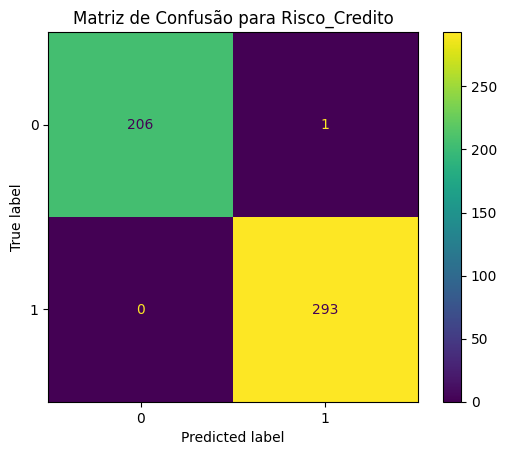


Matriz de Confusão para Risco_Compliance


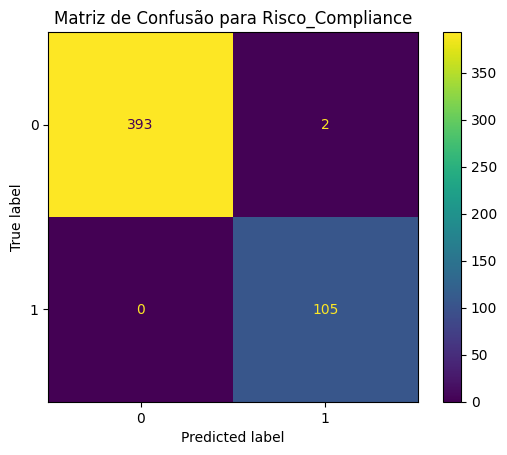


Matriz de Confusão para Risco_Mercado


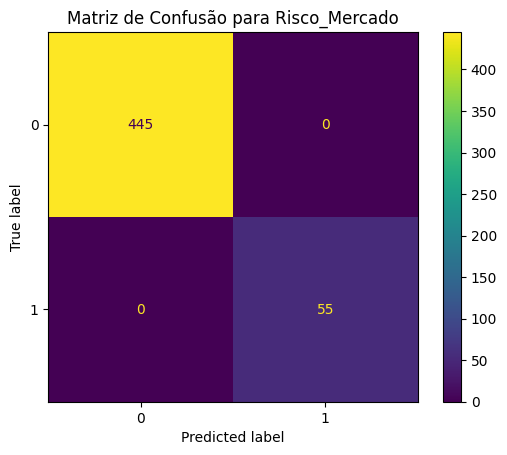

In [25]:
# Mostrar a matriz de confusão para cada classe
for i, target in enumerate(targets):
  print(f'\nMatriz de Confusão para {target}')
  conf_matrix = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
  fig = ConfusionMatrixDisplay(
    conf_matrix,
    display_labels=[0, 1]
  )
  fig.plot()
  plt.title(f'Matriz de Confusão para {target}')
  plt.show()

In [26]:
# Calcular o logloss para cada target
print('Log Loss por Target')
for i, target in enumerate(targets):
  log_loss_scorer = log_loss(y_test.iloc[:, i], y_pred_proba[:, i])
  print(f'{target}: {log_loss_scorer:.4f}')

Log Loss por Target
Risco_Credito: 0.0042
Risco_Compliance: 0.0061
Risco_Mercado: 0.0002


### Interpretabilidade

In [27]:
# Importância das features - Para cada target

for i, target in enumerate(targets):

  # Obter a importância das features
  importancias = ovr_model.estimators_[i].feature_importances_
  nomes_features = X.columns.tolist()

  # Criar um Dataframe com as importâncias e nomes de features
  df_importancias = pd.DataFrame({
    'feature': nomes_features,
    'importancia': importancias
  })

  # Ordenar o Dataframe
  df_importancias = df_importancias.sort_values(by='importancia', ascending=False).reset_index(drop=True)

  # Montar o Plot
  fig = px.bar(
    df_importancias.head(10),
    x='importancia',
    y='feature',
    orientation='h',
    title=f'Importância das 10 principais features - {target}',
    labels={'importancia': 'Importância', 'feature': 'Feature'},
    color='importancia',
    color_continuous_scale='Armyrose'
  )

  # Personalizar o layout
  fig.update_layout(
    height=600,
    yaxis={'categoryorder': 'total ascending'}
  )

  fig.show()

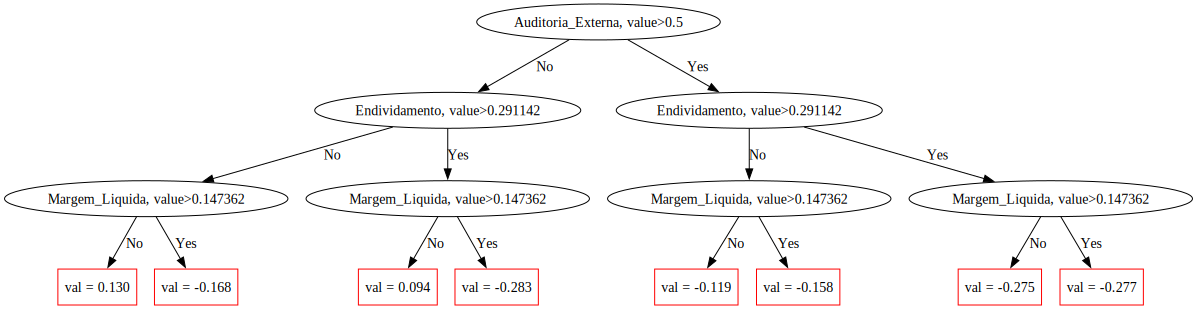

In [28]:
# Visualizar exemplo de árvore
modelo_catboost = ovr_model.estimators_[1]

# Criar o Pool com os dados de treinamento
pool = Pool(
  data=X_train,
  label=y_train.iloc[:, 1],
  cat_features=features_categoricas.tolist(),
  feature_names=list(X_train.columns)
)

# Plotar a árvore
modelo_catboost.plot_tree(tree_idx=0,pool=pool)

In [29]:
# Shap Values

# Criar e rodar explainers para cada target
explainers = []
shap_values = []

for i, target in enumerate(targets):
  print(f'Calculando Shap Values para {target}...')

  # Usar TreeExplainer específico pra Catboost
  explainer = shap.TreeExplainer(ovr_model.estimators_[i])

  # Calcular os valores SHAP
  shap_values_target = explainer.shap_values(X_test)

  # Atualizo as listas
  explainers.append(explainer)
  shap_values.append(shap_values_target)

Calculando Shap Values para Risco_Credito...
Calculando Shap Values para Risco_Compliance...
Calculando Shap Values para Risco_Mercado...



Gráfico SHAP para Risco_Credito


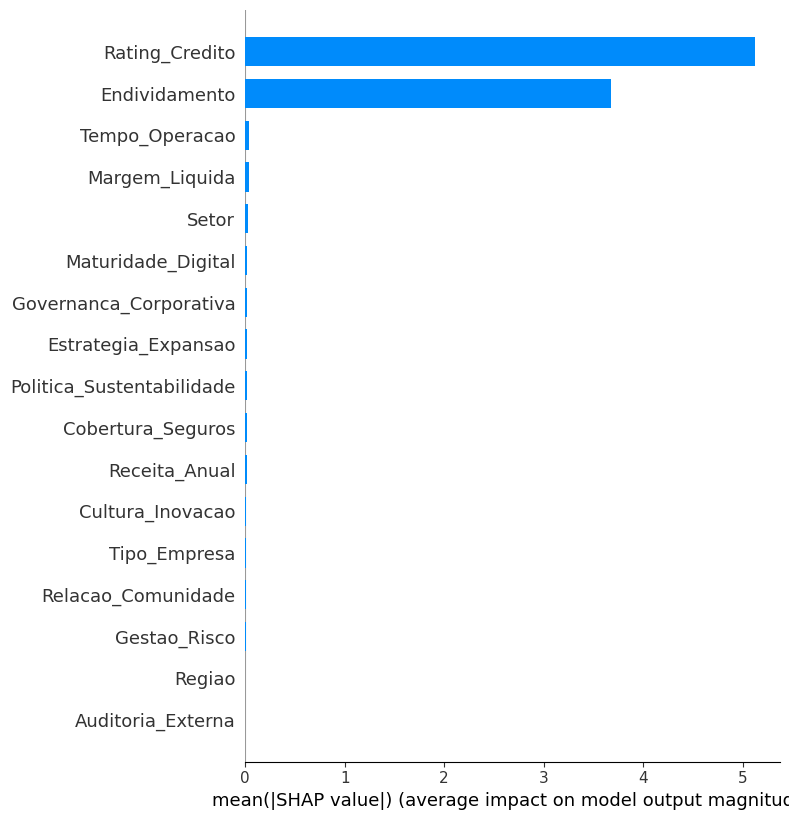

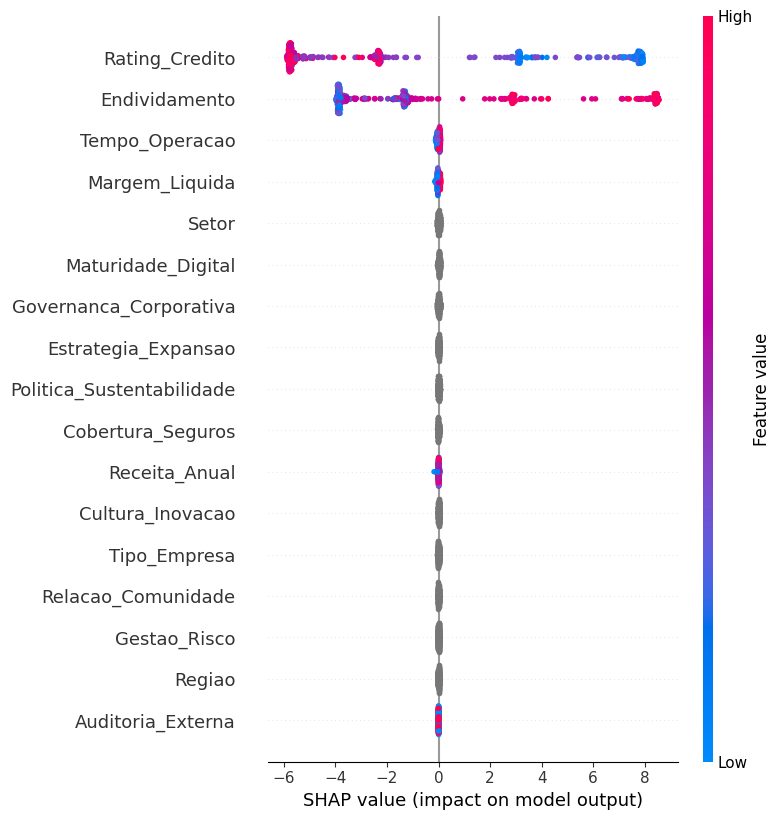


Gráfico SHAP para Risco_Compliance


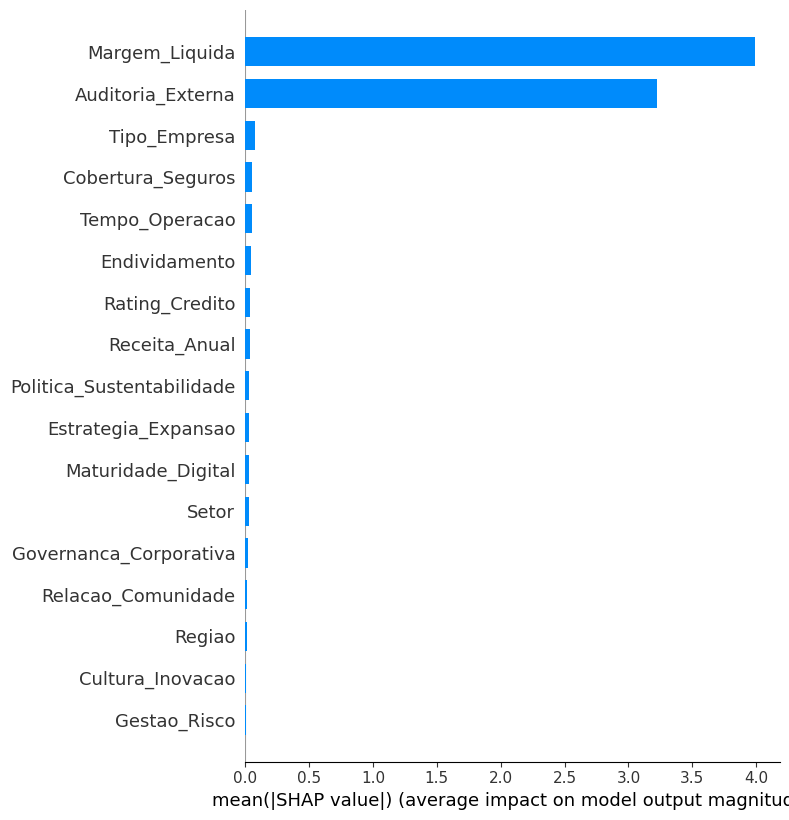

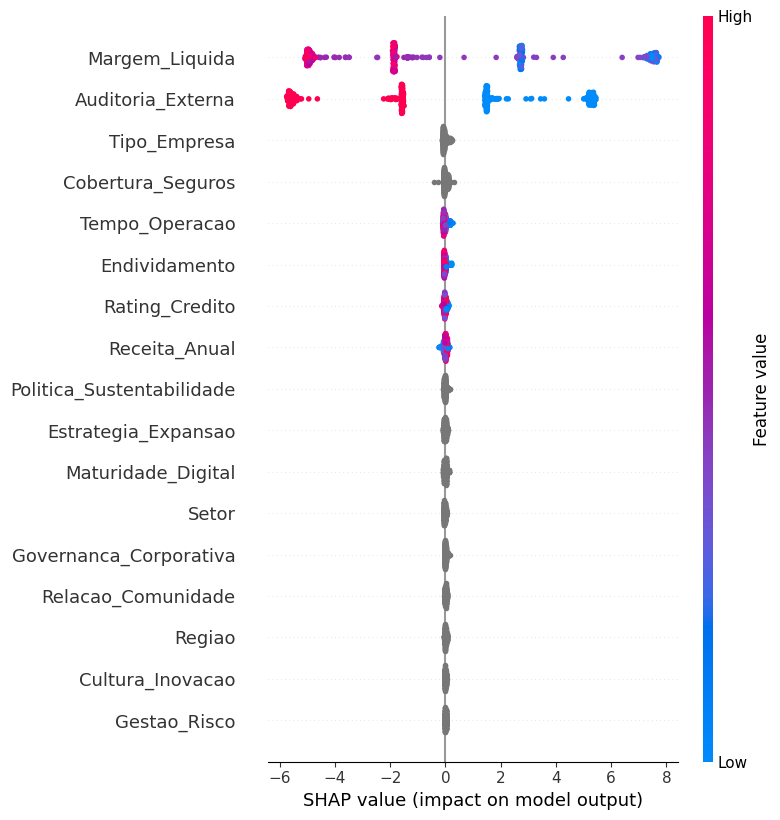


Gráfico SHAP para Risco_Mercado


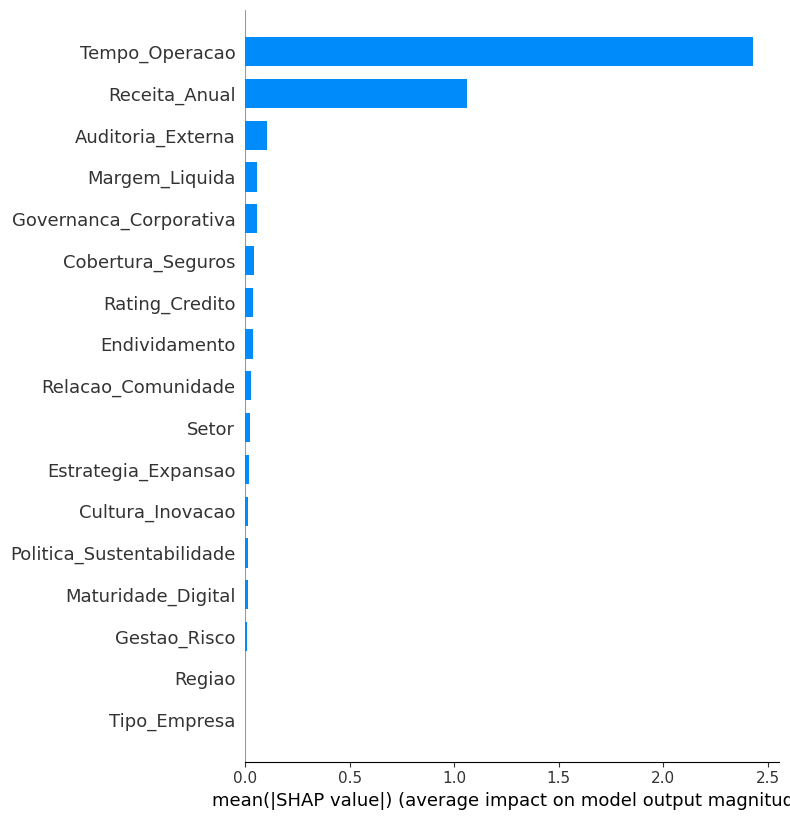

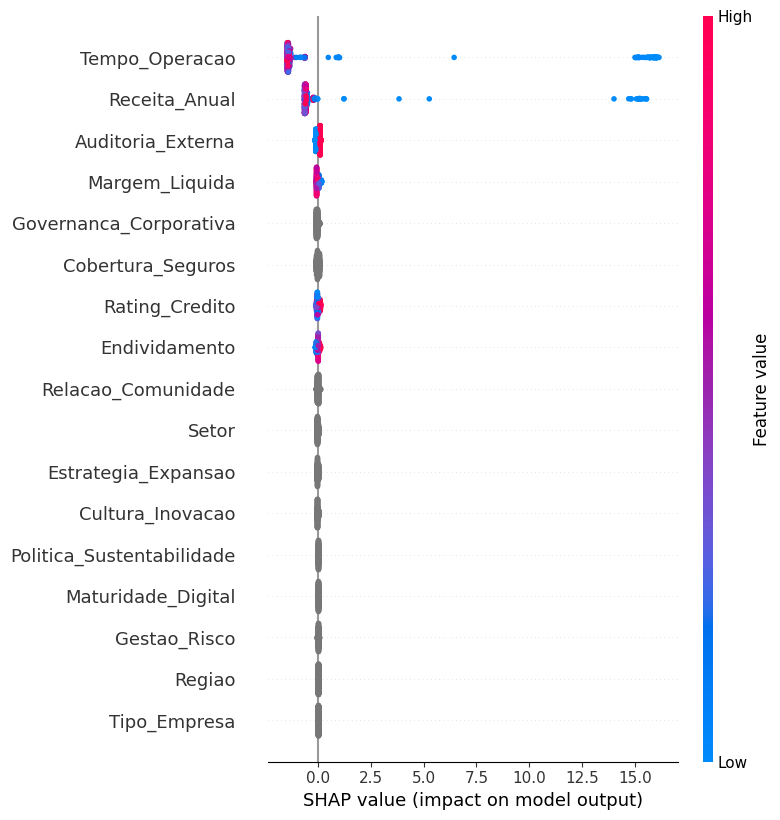

In [31]:
# Plotar gráficos SHAP para cada target
for i, target in enumerate(targets):
  print(f'\nGráfico SHAP para {target}')

  # Criar o gráfico de resumo de SHAP
  shap.summary_plot(
    shap_values[i],
    X_test,
    plot_type='bar',
    title=f'Contribuição Global das Variáveis - {target}',
    show=False
  )
  plt.tight_layout()
  plt.show()

  # Criar o gráfico de resumo de SHAP
  shap.summary_plot(
    shap_values[i],
    X_test,
    title=f'Distribuição dos Valores SHAP - {target}',
    show=False
  )
  plt.tight_layout()
  plt.show()